#Temperature forecast model applied to Colombia

Currently, one of the most relevant challenges for humanity is to face and mitigate climate change associated with activities that produce greenhouse gases and deforestation. According to [(IDEAM, PNUD, MADS, DNP, CANCILLERÍA. 2015)](https://http://documentacion.ideam.gov.co/openbiblio/bvirtual/022963/escenarios_cambioclimaticodepartamental/Estudio_tecnico_completo.pdf), an increase in temperature causes an imbalance in the earth's natural systems, fundamental in the development of human productive activities.

Considering this, our goal is to **predict the behavior of the temperature until the year 2040 by means of the implementation of different machine learning models, taking into account different variables such as population, GDP, energy consumption and gas and agriculture emissions.**



## Importing the libraries

In [ ]:
##Tratamiento de datos
import pandas as pd
import numpy as np
import string
import requests
from datetime import timedelta
import datetime as dt
from numpy import mean
from numpy import std
import io
import json
from pandas import json_normalize
from pandas.io.json import json_normalize


#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import cufflinks as cf
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import plotly
import plotly.express as px
import plotly.offline as py
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.tools as tls


#Preprocesado y modelado de datos
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn import metrics

# Otros pendientes por verificar si se usaron
from scipy.stats import pearsonr
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

## Importing the datasets


In [ ]:
#FAOSTAT
LandCoverCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/LandCover.csv'
ForestlandCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Forestland.csv'
CropsLivestocksProductsCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/CropsLivestocksProducts.csv'
ForestlossCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/forestloss.csv'
ForestgainCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Forestgain.csv'

#WorldBank
worldbankCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/data_WorldBank.csv'
forestloss_department_CSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/deparmen_table.csv'
forestloss_municipal_CSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/municipal_table.csv'

# Hansen
HansenCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/forestloss_year.csv'

#This information is available in https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
Energy_CSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Colombia_Consumo_energia.csv'

#This information is available in https://github.com/owid/co2-data
Emissions_GDP_CSV= 'https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Colombia_emisiones_y_gdp.xlsx'

#This information is available in https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_MONTHLY#description 
Temperature_CSV = "https://raw.githubusercontent.com/ajrianop/projectDS4A/main/mean_temperature.csv"

#Departamental Data
#PIB
Depto_PIB_CSV = 'https://raw.githubusercontent.com/ajrianop/projectDS4A/main/PIB_Deptos_valorcorriente.csv'
Depto_Valor_Agr_CSV = 'https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Valor agregado_Depto_Agr_Ganad_Silvic_Pesca.csv'
Depto_Valor_Minas_CSV = 'https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Valor agregado_Depto_Explot Minas y Canteras.csv'
Depto_Valor_Industria_CSV = 'https://raw.githubusercontent.com/ajrianop/projectDS4A/main/Valor agregado_Depto_Industrias Manufactureras.csv'
#PIB with transposed columns
departament_pib_CSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/code_department_pib.csv'
#Temperature
departament_temperature_CSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/code_department_temp.csv'
#Deforestation
departament_def_CSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/code_department_def.csv'

For the approach of the model we have five datasets, which contains information about forest area, greenhouse gases, energy consumption by category, temperature, gdp and cattle.

1. World Bank: 

  - Forest area (sq. km)
  - Agricultural land (sq. km)
  - Agricultural methane emissions (thousand metric tons of CO2 equivalent)
  - Agricultural nitrous oxide emission (thousand metric tons of CO2 equivalent)

2. Energy: 
  - coal_consumption (TWh)
  - fossil_fuel_consumption (TWh)
  - gas_consumption (TWh)
  - hydro_consumption (TWh)
  - oil_consumption (TWh)
  - other_renewable_consumption (TWh)
  - primary_energy_consumption (TWh)
  - renewables_consumption (TWh)
  - population (number of people)

3. Temperature
  - temperature (Celcius degrees)

4. Emissions and GDP
  - co2 (Kilotonnes)
  -	total_ghg	(Kilotonnes)
  - methane (Kilotonnes)
  -	nitrous_oxide (Kilotonnes)
  - GDP (billions of pesos) - Information from DANE

5. Cattle
  - Cattle (Number of heads)
  - Pigs (Number of heads)



## Data cleaning

### World Bank

In [ ]:
df_worldbank=pd.read_csv(worldbankCSV,encoding='unicode_escape')
columnas=["Series Name","Series Code","Country Name","Country Code"]
lista=list(range(1960,2022))
columnas.extend(lista)
df_worldbank=df_worldbank.set_axis(columnas,axis=1,inplace=False)
df_worldbank.head()

,Series Name,Series Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Forest area (% of land area),AG.LND.FRST.ZS,Colombia,COL,..,..,..,..,..,..,...,54.5638017124831,54.4424623704371,54.3211230283912,54.1997836863452,54.0419017575485,53.8438666065795,53.6642451554754,53.4846327174403,53.3050112663362,..
1,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,Colombia,COL,..,..,..,..,..,..,...,..,1.45172663090531,..,..,..,..,..,..,..,..
2,Agricultural land (% of land area),AG.LND.AGRI.ZS,Colombia,COL,..,36.0252365930599,36.9283461018477,37.3979269941415,37.8503830554304,38.7634069400631,...,38.411536728256,40.392609283461,40.3647589004056,40.3369986480397,40.3091482649842,44.6137899954935,44.6074808472285,..,..,..
3,Agricultural land (sq. km),AG.LND.AGRI.K2,Colombia,COL,..,399700,409720,414930,419950,430080,...,426176,448156,447847,447539,447230,494990,494920,..,..,..
4,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,Colombia,COL,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [ ]:
df=df_worldbank.drop(columns=["Series Code", "Country Name", "Country Code"])
df.set_index("Series Name",inplace=True)
df=df.T
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df = df.iloc[:, :-5]
df = df.reset_index()

In [ ]:
#Selection of the most relevant variables for the model
df_worldbank = df[["index", "Urban population", "Rural population", "Forest area (sq. km)", "Agricultural land (sq. km)"
            ,"Agricultural methane emissions (thousand metric tons of CO2 equivalent)", "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)"
            ]].rename(columns={'index': 'Year',  'Forest area (sq. km)': 'Forest area', 'Agricultural land (sq. km)': 'Agricultural land', 
                               'Agricultural methane emissions (thousand metric tons of CO2 equivalent)': 'Agricultural methane emissions',
                               "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)": "Agricultural nitrous oxide emissions"})

In [ ]:
#Nulls 
df_worldbank[df_worldbank["Year"] >= 1990].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 30 to 61
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  32 non-null     int64  
 1   Urban population                      31 non-null     float64
 2   Rural population                      31 non-null     float64
 3   Forest area                           31 non-null     float64
 4   Agricultural land                     29 non-null     float64
 5   Agricultural methane emissions        29 non-null     float64
 6   Agricultural nitrous oxide emissions  29 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.0 KB


Given that our data doesn't have a large number of nulls, we will use ffill() function, which propagates last valid observation forward. 

We also removed Year 2021 because it isn't enough information to consider it into the model.

In [ ]:
#Removing 2021
df_worldbank = df_worldbank[df_worldbank["Year"] >= 1990]
df_worldbank = df_worldbank[df_worldbank["Year"] < 2020]

#Using ffill() to handle nulls
df_worldbank.ffill(inplace = True)

### Energy

In [ ]:
df_energy = pd.read_csv(Energy_CSV,encoding='unicode_escape', sep = ";")

df_energy = df_energy.drop(["iso_code", "country", "Unnamed: 12",	"Unnamed: 13"], axis = 1)

#Filling null values with ffill()
df_energy.ffill(inplace = True)

In [ ]:
#We found out that our data is separated by comma, so we changed it for dots.

df_energy['coal_consumption'] =pd.to_numeric(df_energy['coal_consumption'].str.replace(',','.'))
df_energy['fossil_fuel_consumption'] =pd.to_numeric(df_energy['fossil_fuel_consumption'].str.replace(',','.'))
df_energy['oil_consumption'] =pd.to_numeric(df_energy['oil_consumption'].str.replace(',','.'))
df_energy['hydro_consumption'] =pd.to_numeric(df_energy['hydro_consumption'].str.replace(',','.'))
df_energy['gas_consumption'] =pd.to_numeric(df_energy['gas_consumption'].str.replace(',','.'))
df_energy['other_renewable_consumption'] =pd.to_numeric(df_energy['other_renewable_consumption'].str.replace(',','.'))
df_energy['primary_energy_consumption'] =pd.to_numeric(df_energy['primary_energy_consumption'].str.replace(',','.'))
df_energy['renewables_consumption'] =pd.to_numeric(df_energy['renewables_consumption'].str.replace(',','.'))

### Temperature

In [ ]:
df_temperature = pd.read_csv(Temperature_CSV, encoding='unicode_escape')
df_temperature = df_temperature.rename(columns={'mean_2m_air_temperature': 'Temperature'})

df_temperature["Year"]=df_temperature["Year"].str.replace(",","").astype(int)
df_temperature.head()

,Year,Temperature
0,1979,296.803
1,1980,297.037
2,1981,296.700
3,1982,296.621
4,1983,296.957


In [ ]:
#Convert to Celsius
df_temperature["Temperature"] = df_temperature["Temperature"] - 273.15 

### Emissions and GDP

In [ ]:
df_emissions_gdp = pd.read_excel(Emissions_GDP_CSV)

df_emissions_gdp = df_emissions_gdp.drop(["iso_code", "country"], axis= 1)

#Null values
df_emissions_gdp.isnull().value_counts()

year   co2    total_ghg  methane  nitrous_oxide  gdp  
False  False  False      False    False          False    29
              True       True     True           False     1
                                                 True      1
dtype: int64

In [ ]:
#Filling null values
df_emissions_gdp.ffill(inplace = True)
df_emissions_gdp.bfill(inplace = True)

In [ ]:
df_emissions_gdp.head()

,year,co2,total_ghg,methane,nitrous_oxide,gdp
0,1990,56.898,217.08,57.47,18.06,26371.0
1,1991,56.654,218.85,57.51,18.06,34170.0
2,1992,61.495,222.51,58.54,18.05,44200.0
3,1993,63.338,226.53,59.64,18.38,58932.0
4,1994,66.791,228.62,60.77,18.67,77147.0


### Cattle

In [ ]:
Products = pd.read_csv(CropsLivestocksProductsCSV,encoding='unicode_escape')
Animals = ["Cattle", "Pigs"]

Livestock_animals = Products[(Products["Element"] == "Stocks") & (Products["Item"].isin(Animals))]
Livestock_animals = Livestock_animals[["Year", "Item", "Value"]]

Livestock_animals.isnull().value_counts()

Year   Item   Value
False  False  False    120
dtype: int64

In [ ]:
#Pivot table
Livestock_animals = pd.pivot_table(Livestock_animals, index = "Year", columns = "Item",values="Value").reset_index()

### Merge of the datasets

In [ ]:
df_final = df_worldbank.merge(df_energy, right_on = "year", left_on = "Year")
df_final = df_final.merge(df_temperature, on = "Year")
df_final = df_final.merge(df_emissions_gdp, right_on = "year", left_on = "Year")
df_final = df_final.merge(Livestock_animals, on = "Year")

In [ ]:
df_final.columns

Index(['Year', 'Urban population', 'Rural population', 'Forest area',
       'Agricultural land', 'Agricultural methane emissions',
       'Agricultural nitrous oxide emissions', 'year_x', 'coal_consumption',
       'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption',
       'oil_consumption', 'other_renewable_consumption',
       'primary_energy_consumption', 'renewables_consumption', 'population',
       'Temperature', 'year_y', 'co2', 'total_ghg', 'methane', 'nitrous_oxide',
       'gdp', 'Cattle', 'Pigs'],
      dtype='object')

In [ ]:
df_final = df_final.drop(['year_x', 'year_y'], axis = 1)

## Exploratory Data Analysis

To define which variables are required in the construction of the model, we are going to carry out an analysis to determine the importance of the relation of the variables with the temperature and among them.

**Variables description**

- Year
- Temperature (Celcius degrees)
- Urban population
- Rural population
- Forest area (sq. km)
- Agricultural land (sq. km)
- Agricultural methane emissions (thousand metric tons of CO2 equivalent)
- Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)
- Coal_consumption (TWh)
- Fossil_fuel_consumption (TWh)
- Oil_consumption (TWh)
- Gas_consumption (TWh)
- Hydro_consumption (TWh)
- Other_renewable_consumption (TWh)
- Primary_energy_consumption (TWh)
- Renewables_consumption (TWh)
- Population 
- Co2 (Kilotonnes)
- Total_ghg (Kilotonnes)
- Methane (Kilotonnes)
- Nitrous_oxide (Kilotonnes)
- Gdp (billions of pesos)
- Cattle (Number of heads)
- Pigs (Number of heads)

### National

#### Graphs

In [ ]:
df_final = df_final.set_index("Year")

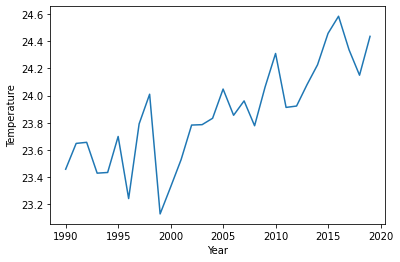

In [ ]:
#How has the temperature behaved in recent years?

sns.lineplot(x="Year", y="Temperature",data=df_final)

The temperature has a tendency to increase for the time period studied. However this increment is not constant, since there are years where the temperature decreases with respect to the previous year.

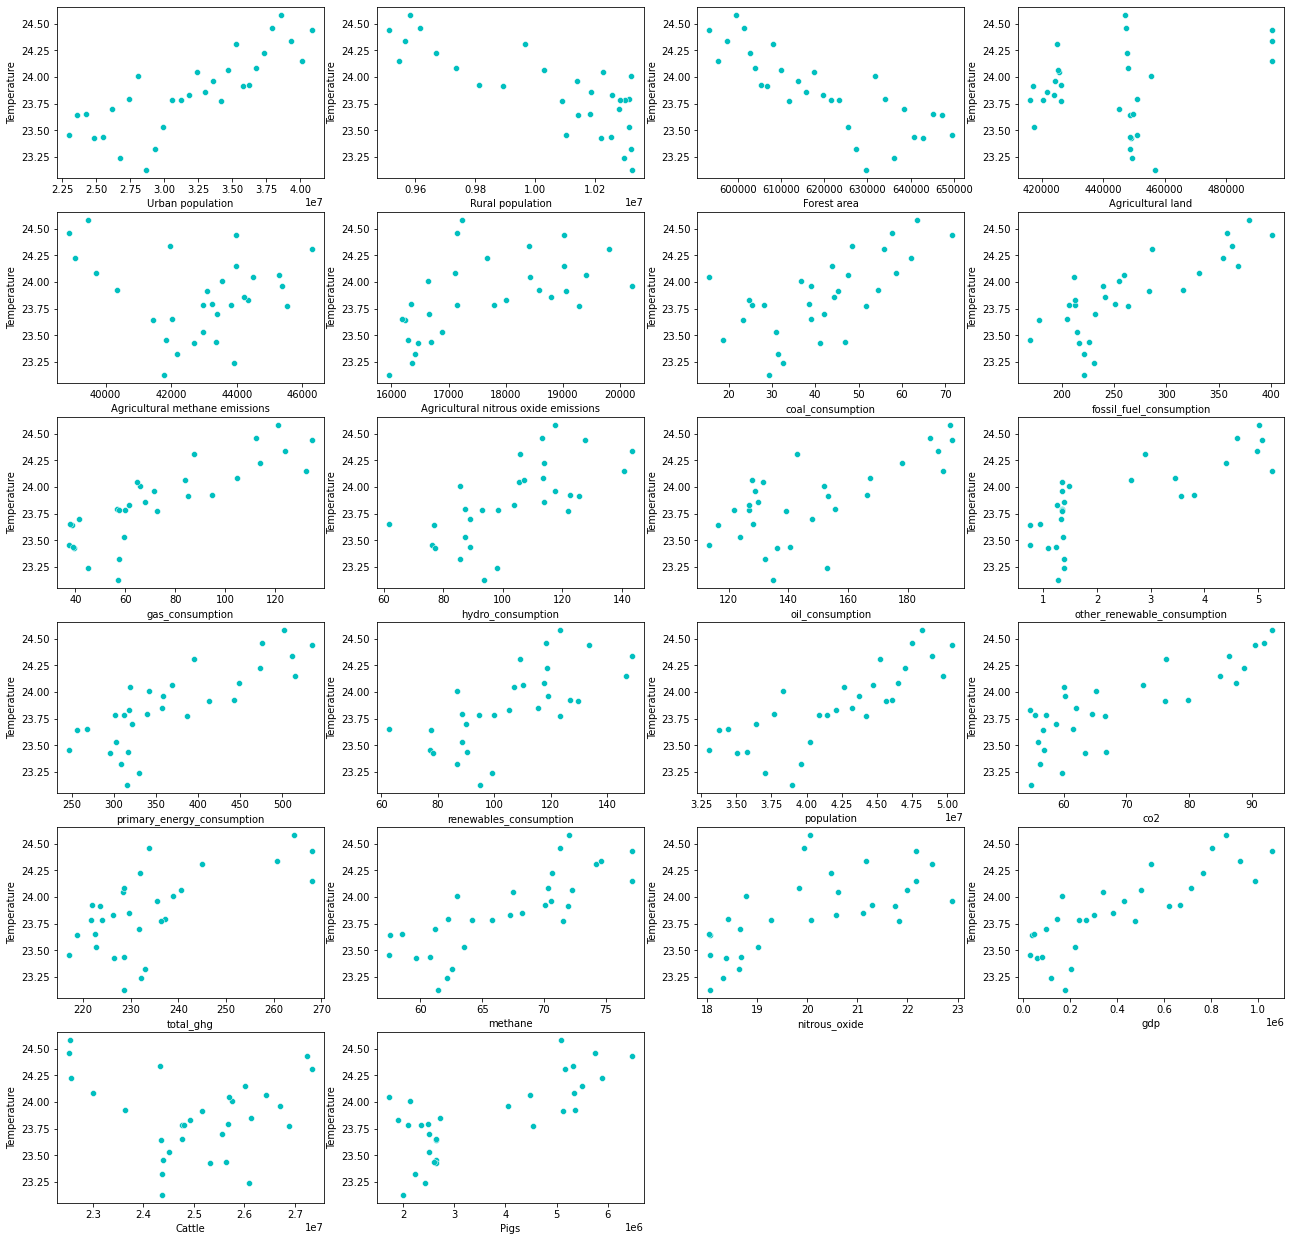

In [ ]:
#Interaction between temperature and the explanatory variables
variables = df_final.drop(["Temperature"], axis = 1).columns

plt.figure(figsize=(22,22))
for i,var in enumerate(variables):
    plt.subplot(6,4,i+1)
    sns.scatterplot(x=var, y='Temperature', data=df_final, color="c")

In [ ]:
#Using interactive_plot to know the tendency of each variable through the years
def pair_plot(y):
  plt.figure(2)
  x=df_final.index
  df_final.plot(kind="line",y=y, figsize=(15,8))
  #plt.scatter(df["Forest area (% of land area)"].values, df[y].values, alpha=0.20, edgecolor=None, color='red')
  plt.show()

interactive_plot=interactive(pair_plot,y=list(df_final.columns))
output=interactive_plot.children[-1]
interactive_plot

interactive(children=(Dropdown(description='y', options=('Urban population', 'Rural population', 'Forest area'…

##### Data visualization


In [ ]:
df_finalCSV='https://raw.githubusercontent.com/ajrianop/projectDS4A/main/df_final.csv'
df=pd.read_csv(df_finalCSV,encoding='unicode_escape')

In [ ]:
# Landcover
fig = px.line(df, 
             x = "Year",
             y = ["Forest area", "Agricultural land"],
             #template = 'plotly_dark',
             title = 'Land use (Square kilometers)',
              labels={"variable": ""
                    }
             )


fig.update_layout(yaxis_range=[0,700000])

fig.update_traces(line_width=5)
# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))

# Set y-axes titles
fig.update_yaxes(title_text="Square kilometers")

fig.show()

In [ ]:
# Population
fig = px.bar(df, 
             x = "Year",
             y = ["Urban population", "Rural population"],
             title = 'Population',
             labels={"variable": ""
                    }
             )
fig.add_trace(
    go.Scatter(x=df["Year"], y=df["population"], name="Total population",hoveron='points'),
    
)

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))

# Set y-axes titles
fig.update_yaxes(title_text="Number of inhabitants")


fig.show()

In [ ]:
# Renewable and Hydro energy consumption
fig=px.line(df,x=df["Year"],y=["hydro_consumption", "renewables_consumption"],
                  labels={
                     "value": "Consumption of hydroelectric and renewable energy (tWh)",
                     "variable": ""
                    })
fig.update_layout(yaxis_range=[0,160])

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))
# Set y-axes titles
fig.update_yaxes(title_text="Energy consumption (tWh)")



fig.update_traces(line_width=5)


fig.show()

Until approximately 2007, renewable energy was based mainly on energy from hydroelectric plants. As of 2007, the other renewable sources, such as solar and wind energy, increased their production. In 2014, Law 1715 promoting renewable energy comes out. And in 2016 Colombia joined the International Renewable Energy Agency, IRENA, another incentive for the implementation of these sources in the country.

In [ ]:
# Energy consumption filtered
fig = px.bar(df, 
             x = "Year",
             y = ["coal_consumption", "gas_consumption","oil_consumption", "renewables_consumption"],
             title = 'Energy consumption', 
             labels={
                     "value": "Energy consumption: hydroelectric and renewable (tWh)",
                     "variable": ""
                    },
             )
fig.add_trace(
    go.Scatter(x=df["Year"], y=df["primary_energy_consumption"], name="Primary energy consumption",hoveron='points'),
)

fig.update_layout(yaxis_range=[0,600])

# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))
# Set y-axes titles
fig.update_yaxes(title_text="Energy consumption (tWh)")

fig.show()

Over the years in Colombia energy consumption increases. The most consumed source of energy is oil. In 1990 this was the main source of energy, because it represented more than 50% of primary energy consumption (A primary energy source is any form of energy available in nature before being converted or transformed. Taken from Wikipedia). By 2019, oil represents less than a third of the energy consumed, however the net amount that is consumed is almost double what was consumed in 1990. The energy source that has had the greatest growth is gas, given the gasification of important services, mainly public services. This gasification to date, 2022, continues to have government incentives, so it is expected to continue growing. Energy consumption will continue to increase over time, given population growth, population migration from rural to urban, among other factors.

In [ ]:
# Gas emissions
fig = px.bar(df, 
             x = "Year",
             y = ["co2", "methane", "nitrous_oxide"],
             title = 'Greenhouse gas emission',  
             )
fig.add_trace(
    go.Scatter(x=df["Year"], y=df["total_ghg"], name="Total greenhouse gases",hoveron='points'),
)

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))
# Set y-axes titles
fig.update_yaxes(title_text="Gas emission (kilotonnes)")

fig.update_layout(yaxis_range=[0,300])



fig.show()

Just as energy consumption increases over the years, so does the emission of greenhouse gases, such as carbon dioxide (CO2), Methane (CH4), Nitrous Oxide (N2O), Hydrofluorocarbons (HFC), Hexafluoride sulfur (SF6) and Perfluorocarbons (PFC). These gases contribute to increasing the temperature of the planet, because they absorb and send infrared radiation from the earth's surface. Furthermore, they remain in the atmosphere for years, decades, or even centuries. Are produced
in many human activities such as industrial activities, transportation, agricultural production, deforestation, disposal of solid and liquid waste, conversion of moors and wetlands into farmland or mining activities, among others (www.siac.gov.co). Until the maximum date of the data of this study, 2019, the gas that is emitted the most is carbon dioxide, followed by methane and nitrous oxide.

In [ ]:
# Cattle and Agricultural Methane emissions
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df["Year"], y=df["Cattle"], name="Cattle"),
    secondary_y=False, 
)

fig.add_trace(
    go.Scatter(x=df["Year"], y=df["Agricultural methane emissions kT"], name="Agricultural methane emissions"),
    secondary_y=True, 
)

# Add figure title
fig.update_layout(
    title_text="Cattle and Agricultural methane emissions"
)

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))

# Set y-axes titles
fig.update_yaxes(title_text="Cattle", secondary_y=False)
fig.update_yaxes(title_text="Agricultural methane emissions (kilotonnes)", secondary_y=True)



fig.update_traces(line_width=5)

fig.show()

Methane emissions from agriculture and livestock numbers follow a similar trend over time. This can be explained because methane gas is one of the products of cattle digestion and some countries such as Mexico and New Zealand study the effect of methane gas from cows as part of greenhouse gases.

In [ ]:
fig = px.line(df, 
             x = "Year",
             y = ["methane", "Agricultural methane emissions kT", "nitrous_oxide","Agricultural nitrous oxide emissions kT"],
              labels={
                     "variable": ""
                    },
             )



fig.update_traces(line_width=5)

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))

# Set y-axes titles
fig.update_yaxes(title_text="kilotonnes")

fig.show()


In [ ]:
# GDP and CO2

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df["Year"], y=df["gdp"], name="Gross domestic product (GDP)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df["Year"], y=df["co2"], name="CO2 emissions"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="GDP and CO2 emissions"
)

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))

# Set y-axes titles
fig.update_yaxes(title_text="GDP (Billions of pesos)", secondary_y=False)
fig.update_yaxes(title_text="CO2 emissions (Kilotonnes)", secondary_y=True)


fig.update_traces(line_width=5)
fig.show()

In [ ]:
# TEMPERATURE and CO2

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df["Year"], y=df["Temperature"], name="Temperature",line_color='#FF0000'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df["Year"], y=df["co2"], name="CO2 emissions", line_color= '#00ff00'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Temperature and CO2 emissions"
)

# Set x-axis title and range
fig.update_xaxes(title_text="Year")
fig.update_xaxes(range=(1990,2020))

# Set y-axes titles
fig.update_yaxes(title_text="Temperature (°C)", secondary_y=False)
fig.update_yaxes(title_text="CO2 emissions (kilotonnes)", secondary_y=True)


fig.update_traces(line_width=5)

fig.show()

#### Data Selection

As we have a small dataset, choosing the right variables is very important for the accuracy of the model. 

In the datasets we found a strong relationship between:

1. Population = Urban population + Rural population
2. Agricultural methane emissions is contained in methane
3. Agricultural nitrous oxide emissions is contained in nitrous_oxide
4. Fossil_fuel_consumption = coal_consumption + gas_consumption + oil_consumption
5. Renewables_consumption = hydro_consumption + others
6. Total_ghg = co2 + methane + nitrous_oxide + others
7. Cattle and Pigs are contained in methane since the animales produce that.

Given this information, we decided to take the total variables to reduce model complexity.

In [ ]:
df_final.columns

Index(['Urban population', 'Rural population', 'Forest area',
       'Agricultural land', 'Agricultural methane emissions',
       'Agricultural nitrous oxide emissions', 'coal_consumption',
       'fossil_fuel_consumption', 'gas_consumption', 'hydro_consumption',
       'oil_consumption', 'other_renewable_consumption',
       'primary_energy_consumption', 'renewables_consumption', 'population',
       'Temperature', 'co2', 'total_ghg', 'methane', 'nitrous_oxide', 'gdp',
       'Cattle', 'Pigs'],
      dtype='object')

In [ ]:
df_final = df_final.drop(['Urban population', 'Rural population',
       'Agricultural land', 'Agricultural methane emissions', 'hydro_consumption',
       'Agricultural nitrous oxide emissions', 'other_renewable_consumption', 
       'primary_energy_consumption', 'co2', 'methane', 'nitrous_oxide', 'Cattle', 'Pigs'
       , 'oil_consumption', 'coal_consumption', 'gas_consumption'], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



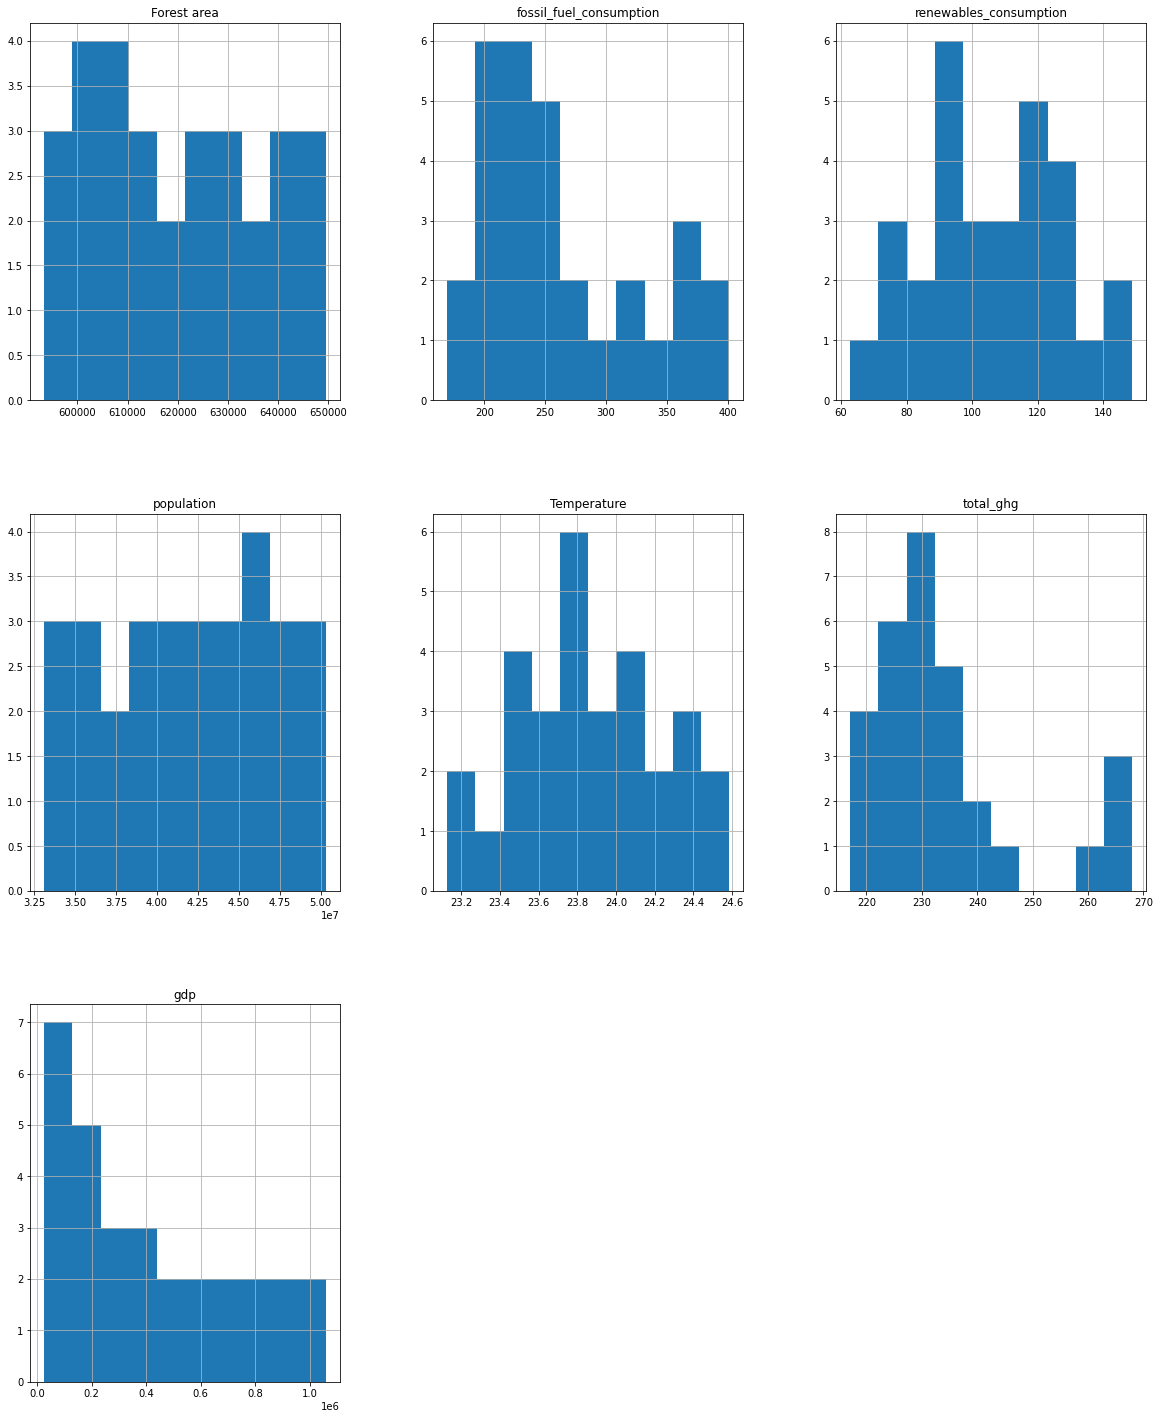

In [ ]:
#Distribution of the data

fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df_final.hist(ax = ax)
plt.show()

##### Data normalization

In this case, we are going to use **MinMaxScaler**, which transforms data by scaling features to a given range, usually [0,1]. It scales the values to a specific value range without changing the shape of the original distribution.

In [ ]:
scaler = MinMaxScaler(feature_range=(0.000001, 1),)
data_scaler = df_final
data_scaler = pd.DataFrame(data = scaler.fit_transform(data_scaler), columns = data_scaler.columns, index=data_scaler.index)

#df_final-df_final.min()/(df_final.max()-df_final.min())

In [ ]:
data_scaler.head()

,Forest area,fossil_fuel_consumption,renewables_consumption,population,Temperature,total_ghg,gdp
Year,,,,,,,
1990,1.000000,0.000001,0.166537,1.000000e-06,0.226118,0.000001,0.000001
1991,0.960430,0.038498,0.173814,3.800282e-02,0.356702,0.034796,0.007546
1992,0.920859,0.153924,0.000001,7.658482e-02,0.362200,0.106744,0.017249
1993,0.881289,0.203365,0.181906,1.153409e-01,0.206186,0.185768,0.031501
1994,0.841719,0.246206,0.319580,1.540969e-01,0.209623,0.226854,0.049122


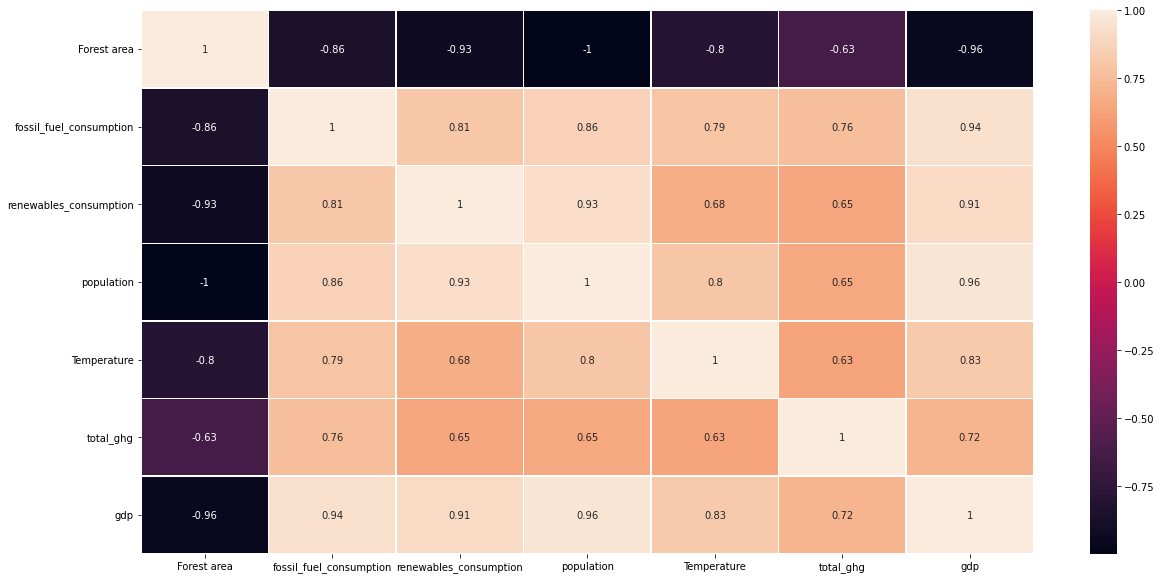

In [ ]:
# Correlation between variables
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_scaler.corr(), linewidths=.5, annot=True, ax=ax)

### Departamental

In [ ]:
temp_department=pd.read_csv(departament_temperature_CSV,encoding='unicode_escape', dtype = {'COD_DPTO': str})
pib_department=pd.read_csv(departament_pib_CSV,encoding='unicode_escape', dtype = {'COD_DPTO': str})
def_department=pd.read_csv(departament_def_CSV,encoding='unicode_escape', dtype = {'COD_DPTO': str})

In [ ]:
#DATA CLEANING DE PIB
pib_department=pib_department.dropna(axis='rows')
pib_department=pib_department[pib_department['0']!='ARAUCA']
pib_department=pib_department[pib_department['0']!='GUAVIARE']
pib_department=pib_department[pib_department['0']!='AMAZONAS']
pib_department=pib_department[pib_department['0']!='CASANARE']
pib_department=pib_department[pib_department['0']!='GUAINIA']
pib_department=pib_department[pib_department['0']!='VICHADA']
pib_department=pib_department[pib_department['0']!='VAUPES']
pib_department=pib_department[pib_department['0']!='PUTUMAYO']
pib_department=pib_department[pib_department['0']!='ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA']
#print(pib_department['0']!='SANTAFE DE BOGOTA D.C')

In [ ]:
#DATA CLEANING DE DEFORESTACION
for i in range(1990,2013):
    l=str(i)
    def_department[l]=def_department[l].str.replace(',','.').astype(float)

LAT_CUN=temp_department[temp_department['DEPARTAMENTO']=='CUNDINAMARCA']['latitude']
LON_CUN=temp_department[temp_department['DEPARTAMENTO']=='CUNDINAMARCA']['longitude']

In [ ]:
temp_department.columns
df_temp_dep=temp_department[['Departamento', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
df_temp_dep=df_temp_dep.set_index('Departamento')
df_temp_dep.index.names=['']
df_temp_dep2=df_temp_dep.T

In [ ]:
def_department.columns
def_dep=def_department[['DEPARTAMENTO', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020']]
def_dep=def_dep.set_index('DEPARTAMENTO')
def_dep
def_dep.index.names=['']
def_dep2=def_dep.T

In [ ]:
pib_department.columns
df_pib_dep=pib_department[['DEPARTAMENTO', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
df_pib_dep=df_pib_dep.set_index('DEPARTAMENTO')
df_pib_dep.index.names=['']
df_pib_dep2=df_pib_dep.T

In [ ]:
#TEMPERATURE and GDP for Antioquia

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df_temp_dep2.index.values, y=df_temp_dep2['ANTIOQUIA'], name="Temperatura",line_color='#FF0000'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=df_pib_dep2.index.values, y=df_pib_dep2["ANTIOQUIA"], name="PIB", line_color= '#00ff00'),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="Temperatura vs Otras variables"
    )

# Set y-axes titles
fig.update_yaxes(title_text="Temperatura (Grados Celsius)", secondary_y=False)
fig.update_yaxes(title_text="PIB (miles de millones)", secondary_y=True)


fig.update_traces(line_width=5)



fig.show()

In [ ]:
#TEMPERATURE and Deforestation for Antioquia

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df_temp_dep2.index.values, y=df_temp_dep2['ANTIOQUIA'], name="Temperatura",line_color='#FF0000'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=def_dep2.index.values, y=def_dep2["ANTIOQUIA"], name="Deforestación", line_color= '#00ff00'),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="Temperatura vs Otras variables"
    )

# Set y-axes titles
fig.update_yaxes(title_text="Temperatura (Grados Celsius)", secondary_y=False)
fig.update_yaxes(title_text="Hectáreas", secondary_y=True)

fig.update_traces(line_width=5)
fig.update_layout(template="plotly_dark")

# Set y-axes titles
fig.update_yaxes(title_text="Temperatura (Grados Celsius)", secondary_y=False)
fig.update_yaxes(title_text="Hectáreas (ha)", secondary_y=True)

fig.update_traces(line_width=5)



fig.show()

## Models

#### OLS Model

In [ ]:
data_scaler = data_scaler.reset_index()

In [ ]:
# Creación de dataset de entrenamiento y test

train     = data_scaler[data_scaler["Year"] < 2016] 
test      = data_scaler[data_scaler["Year"] >= 2016]
print(train.shape)
print(test.shape) 

(26, 8)
(4, 8)


In [ ]:
#Creación de la formula para aplicarla al modelo de OLS
variables_m1 = data_scaler.drop(["Year", "Temperature", "population"], axis= 1).columns

formula ="Temperature ~ "
for i in variables_m1:
    formula +='Q("'+i+'")+'
formula = formula + 'population'

In [ ]:
#Ejecución del modelo
model_all = smf.ols(formula = formula, 
                 data = train).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     8.666
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           0.000126
Time:                        21:41:46   Log-Likelihood:                 19.522
No. Observations:                  26   AIC:                            -25.04
Df Residuals:                      19   BIC:                            -16.24
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -11.3318      6.359     -1.782      0.091     -24.641       1.977
Q("Forest area")                11.6838      6.360      1.837      0.082      -1.628      24.996
Q("fossil_fuel_consumption")    -0.4996      0.396     -1.260      0.223      -1.329       0.330
Q("renewables_consumption")     -0.5976      0.322     -1.858      0.079      -1.271       0.076
Q("total_ghg")                   0.5881      0.274      2.149      0.045       0.015       1.161
Q("gdp")                         1.9750      0.778      2.539      0.020       0.347       3.603
population                      11.6938      6.500      1.799      0.088      -1.911      25.299
==============================================================================
Omnibus:                        3.307   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                1.985
Skew:                          -0.653   Prob(JB):                        0.371
Kurtosis:                       3.354   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the results show, we might have a strong multicollinearity problems, so we are going to carry out a multicollinearity test **-VIF (Variance Inflation Factor)-**, to determine the relationship between the independent variables.

The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. This gives you the R-squared values, which can then be plugged into the VIF formula. 

VIF = 1/1 - R2i

##### Multicollinearity Test

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))
    
    return result

In [ ]:
train_2 = train.drop(["Year", "Temperature"], axis = 1)
calculateVIF(train_2).T

,VIF
Forest area,4081.672766
fossil_fuel_consumption,9.981753
renewables_consumption,6.047233
population,3944.641779
total_ghg,1.968736
gdp,47.369363


**Interpreting the Variance Inflation Factor**

Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance is inflated for each coefficient. 

A rule of thumb for interpreting the variance inflation factor:

  - 1 = not correlated.
  - Between 1 and 5 = moderately correlated.
  - Greater than 5 = highly correlated.

In our case, all the varibles present a high multicollinearity, which makes less reliable our regression results. 

### Regression models using RFE

To deal with this problem, we are going to use [Recursive Feature Elimination (RFE)](https://machinelearningmastery.com/rfe-feature-selection-in-python/), an effective method to select the most relevant features in predicting the target variable. 

This will allow us to be more effective, since some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

We will evaluate de model using repeated stratified k-fold cross-validation, with two repeats and 5 folds.

In [ ]:
#Function to show the predictions of the models
def plot_prediction_time_series(train,test, pred,pred_train):
   
    x=data_scaler["Year"]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)

    ax.ticklabel_format(axis='y', style='plain')

    sns.lineplot(x=x, y=list(pred_train)+list(pred), marker='o')
    sns.lineplot(x=x, y=list(train)+list(test), color='orange', marker='o')

    dates_pred = x.iloc[-4:]

    sns.lineplot(x=dates_pred, y=pred, color='black', marker='o')

    plt.legend(labels=['Training', 'Real', 'Predictions'])
    plt.show()

In [ ]:
#Data spliting
train_data = data_scaler[data_scaler["Year"] < 2016]
test_data = data_scaler[data_scaler["Year"] >= 2016]

X_train = train_data.drop(["Temperature", "Year"], axis = 1)
X_test = test_data.drop(["Temperature", "Year"], axis = 1)

y_train  = train_data.Temperature
y_test = test_data.Temperature

print(X_train.shape)
print(X_test.shape)

(26, 6)
(4, 6)


#### Linear Regression

Linear regression is a linear model that assumes that the response variable (y) is a linear combination of weights multiplied by a set of predictor variables (x). The full formula also includes an error term to account for random sampling noise.

MAE: -0.135 (0.023)
[1.34578306 1.27169137 1.52496116 1.75134889]
Training Error:
Mean Error: 11510.32963427719
Standard Deviation of Error: 58689.734469909556
Test Error:
Mean Error: 0.7500857512695959
Standard Deviation of Error: 0.37858868775167315
Mean Absolute Error (MAE): 0.6158858412063966
Mean Squared Error (MSE): 0.4299740935819484
Root Mean Squared Error (RMSE): 0.6557240986740905
Mean Absolute Percentage Error (MAPE): 75.01
Accuracy: 24.99


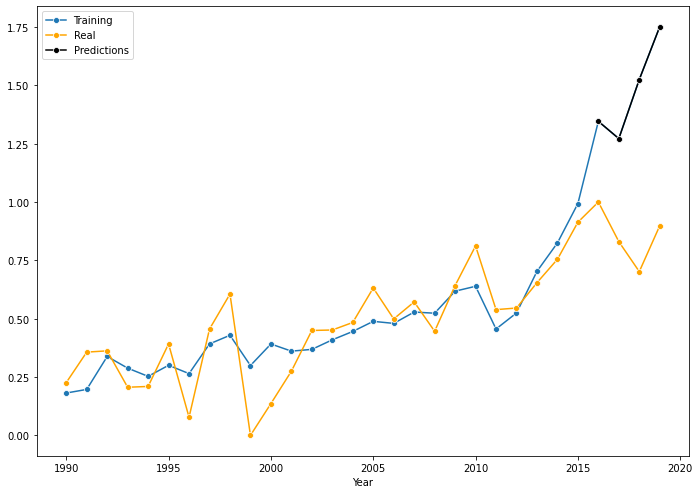

In [ ]:
# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
model = LinearRegression()
pipeline_LR = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline_LR, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on all available data
pipeline_LR.fit(X_train, y_train)

# make a prediction for one example
pred = pipeline_LR.predict(X_test)
print(pred)

pred = pipeline_LR.predict(X_train)
mean_error = (abs(pred-y_train)/y_train).mean()
standard_deviation = (abs(pred-y_train)/y_train).std()

print('Training Error:')

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

print('Test Error:')

pred = pipeline_LR.predict(X_test)
mean_error = (abs(pred-y_test)/y_test).mean()
standard_deviation = (abs(pred-y_test)/y_test).std()

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

#Model Metrics

MAE_LR = metrics.mean_absolute_error(y_test, pred)
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

plot_prediction_time_series(y_train,y_test,pred,pipeline_LR.predict(X_train))

In [ ]:
data = rfe.ranking_
ind = list(X_train.columns)
variables_finales =pd.DataFrame(data,index = ind, columns = ['RFE'])
variables_finales

,RFE
Forest area,1
fossil_fuel_consumption,2
renewables_consumption,1
population,1
total_ghg,1
gdp,1


#### Decision Tree Regressor

[Decision Tree](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda) is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application.

It is a tree-structured classifier with three types of node: 
- The **Root Node** is the initial node which represents the entire sample and may get split further into further nodes. 
- The **Interior Nodes** represent the features of a data set and the branches represent the decision rules.
- Finally, the **Leaf Nodes** represent the outcome.

With a particular data point, it is run completely through the entirely tree by answering True/False questions till it reaches the leaf node.The final prediction is the average of the value of the dependent variable in that particular leaf node. Through multiple iterations, the Tree is able to predict a proper value for the data point.

MAE: -0.122 (0.042)
[0.76424079 0.76285247 0.76285247 0.76285247]
Training Error:
Mean Error: 3194.6752110673533
Standard Deviation of Error: 16289.054643219179
Test Error:
Mean Error: 0.13870290606753613
Standard Deviation of Error: 0.07196421986298882
Mean Absolute Error (MAE): 0.12492771012371323
Mean Squared Error (MSE): 0.020550517867265916
Root Mean Squared Error (RMSE): 0.14335451812644734
Mean Absolute Percentage Error (MAPE): 13.87
Accuracy: 86.13


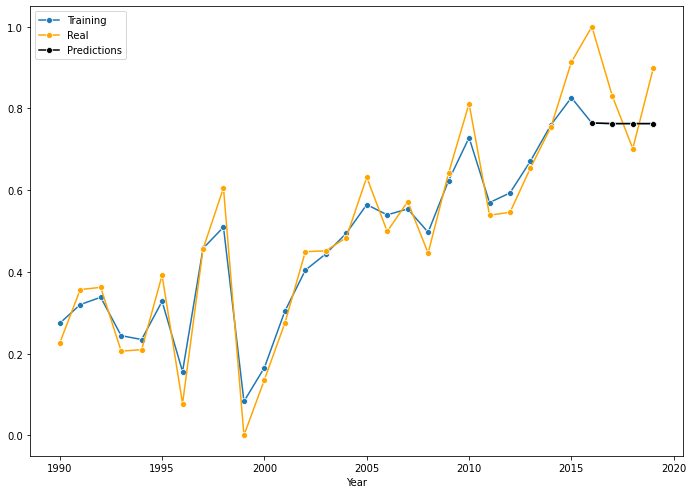

In [ ]:
# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
model = RandomForestRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on all available data
pipeline.fit(X_train, y_train)

# make a prediction for one example
pred = pipeline.predict(X_test)
print(pred)

pred = pipeline.predict(X_train)
mean_error = (abs(pred-y_train)/y_train).mean()
standard_deviation = (abs(pred-y_train)/y_train).std()

print('Training Error:')

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

print('Test Error:')

pred = pipeline.predict(X_test)
mean_error = (abs(pred-y_test)/y_test).mean()
standard_deviation = (abs(pred-y_test)/y_test).std()

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

#Model Metrics

MAE_DTR = metrics.mean_absolute_error(y_test, pred)
RMSE_DTR = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

plot_prediction_time_series(y_train,y_test,pred,pipeline.predict(X_train))

In [ ]:
data = rfe.ranking_
ind = list(X_train.columns)
variables_finales =pd.DataFrame(data,index = ind, columns = ['RFE'])
variables_finales

,RFE
Forest area,1
fossil_fuel_consumption,1
renewables_consumption,1
population,1
total_ghg,2
gdp,1


#### Support Vector Regression

[Support Vector Regression](https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0) uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line, the hyperplane, that has the maximum number of points.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value, which is the distance between the hyperplane and boundary line. 

MAE: -0.129 (0.035)
[0.95555305 0.90172177 0.96748226 1.06497355]
Training Error:
Mean Error: 13875.412159628342
Standard Deviation of Error: 70748.97743926142
Test Error:
Mean Error: 0.17371091166642347
Standard Deviation of Error: 0.14895179700160813
Mean Absolute Error (MAE): 0.1370958546052506
Mean Squared Error (MSE): 0.026375388391004218
Root Mean Squared Error (RMSE): 0.16240501344171682
Mean Absolute Percentage Error (MAPE): 17.37
Accuracy: 82.63


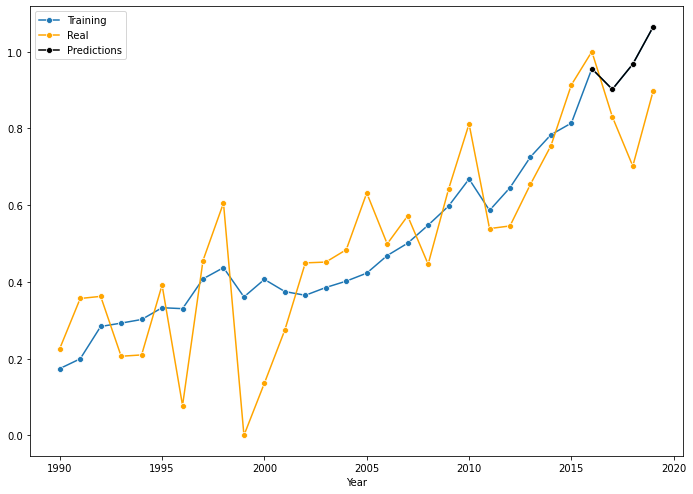

In [ ]:
# create pipeline
rfe = RFE(estimator=SVR(kernel="linear"), n_features_to_select=5)
model = SVR(kernel="linear")
pipeline_SVR= Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline_SVR, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on all available data
pipeline_SVR.fit(X_train, y_train)

# make a prediction for one example
pred = pipeline_SVR.predict(X_test)
print(pred)

pred = pipeline_SVR.predict(X_train)
mean_error = (abs(pred-y_train)/y_train).mean()
standard_deviation = (abs(pred-y_train)/y_train).std()

print('Training Error:')

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

print('Test Error:')

pred = pipeline_SVR.predict(X_test)
mean_error = (abs(pred-y_test)/y_test).mean()
standard_deviation = (abs(pred-y_test)/y_test).std()

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

#Model Metrics

MAE_SVR = metrics.mean_absolute_error(y_test, pred)
RMSE_SVR = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

plot_prediction_time_series(y_train,y_test,pred,pipeline_SVR.predict(X_train))

In [ ]:
data = rfe.ranking_
ind = list(X_train.columns)
variables_finales =pd.DataFrame(data,index = ind, columns = ['RFE'])
variables_finales

,RFE
Forest area,1
fossil_fuel_consumption,1
renewables_consumption,1
population,2
total_ghg,1
gdp,1


#### Bayesian Ridge

[Bayesian regression](https://https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7) allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates. The output or response is assumed to drawn from a probability distribution rather than estimated as a single value.

One of the most useful type of Bayesian regression is Bayesian Ridge regression which estimates a probabilistic model of the regression problem. Here the prior for the coefficient w is given by spherical Gaussian: 

  p(w⏐λ)=N(w⏐0,λ−1Ip)

The priors over α and λ are choosen to be gamma distributions, the conjugate prior for the precision of the Gaussian.

The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge. The parameters w, α and λ are estimated jointly during the fit of the model. The remaining hyperparameters are the parameters of the gamma priors over α and λ. These are usually choosen to be non-informative. The parameters are estimated by maximizing the marginal log likelihood.


MAE: -0.126 (0.038)
[0.88998271 0.85733311 0.91793061 0.99170718]
Training Error:
Mean Error: 14060.833439975271
Standard Deviation of Error: 71694.50773453483
Test Error:
Mean Error: 0.13869291860450408
Standard Deviation of Error: 0.11829252051783913
Mean Absolute Error (MAE): 0.11168676737369912
Mean Squared Error (MSE): 0.01707843931957497
Root Mean Squared Error (RMSE): 0.1306845029817039
Mean Absolute Percentage Error (MAPE): 13.87
Accuracy: 86.13
R Square/Adjusted R Square: -0.45409248805568647


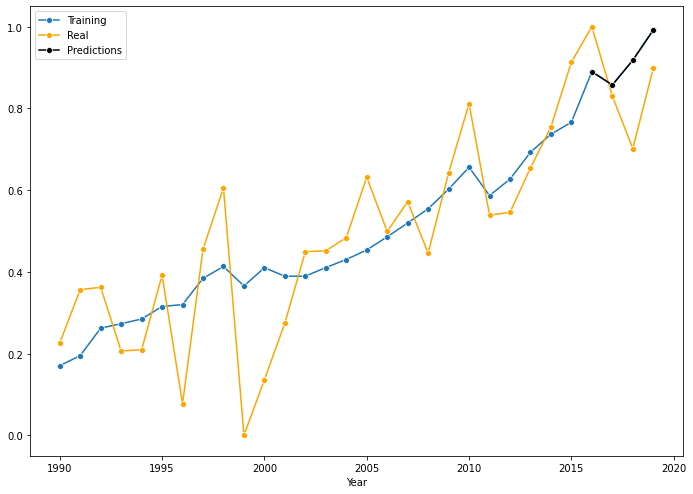

In [ ]:
from sklearn import linear_model

# create pipeline
rfe = RFE(estimator=linear_model.BayesianRidge(), n_features_to_select=6)
model = linear_model.BayesianRidge()
pipeline_BR = Pipeline(steps=[('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline_BR, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on all available data
pipeline_BR.fit(X_train, y_train)

# make a prediction for one example
pred = pipeline_BR.predict(X_test)
print(pred)

pred = pipeline_BR.predict(X_train)
mean_error = (abs(pred-y_train)/y_train).mean()
standard_deviation = (abs(pred-y_train)/y_train).std()

print('Training Error:')

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')

print('Test Error:')

pred = pipeline_BR.predict(X_test)
mean_error = (abs(pred-y_test)/y_test).mean()
standard_deviation = (abs(pred-y_test)/y_test).std()

print(f'Mean Error: {mean_error}')
print(f'Standard Deviation of Error: {standard_deviation}')


#Model Metrics

MAE_BR = metrics.mean_absolute_error(y_test, pred)
RMSE_BR = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
mape = np.mean(np.abs((y_test - pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R Square/Adjusted R Square:', metrics.r2_score(y_test, pred))


plot_prediction_time_series(y_train,y_test,pred,pipeline_BR.predict(X_train))

As we have few independent variables to predict our problem, we decided to run Bayesian Ridge model, the best one until now, with 5 and 6 features. 
The result was that the model had a better performance with 6 features, so in this particular case we didn't need RFE.

### New Approach: Regression models using autocorrelation as a new feature

Now, we are going to try with an additional variable: the autocorrelation of temperature. This will helps us to introduce the behavior of the variable into the model, that means, if the temperature has a clear variation pattern through the years, the model would consider it, helping the optimization of the results. 

One of the assumptions of the time series models is stationarity, so the first step is to check if the temperature complies with this condition with the ADFuller Test. In this case, we use the percentage change to evaulate the variable, since the original doesn't show a stationary trend.

In [ ]:
#Percentage Change - Temperature
var_temperature = df_final["Temperature"].pct_change()
var_temperature.fillna(0,inplace= True)

ADF Statistic: -2.650761
p-value: 0.082953
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


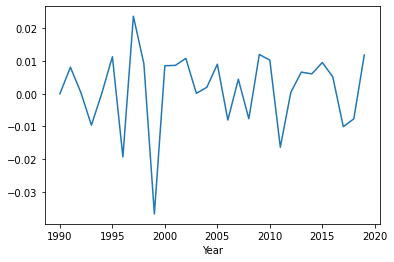

In [ ]:
#ADFuller Test
from statsmodels.tsa.stattools import adfuller

X= var_temperature
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

X.plot()
plt.show()

The ADF shows that the variation in temperature is stationary in the confidence interval of 0.1, which means that it can be included in the model. 

#### Sarima Model

**SARIMA** model is an ARIMA model with a seasonal component. Per the formula SARIMA(p,d,q)x(P,D,Q,s), the parameters for these types of models are as follows:

- p and seasonal P: indicate number of autoregressive terms (lags of the stationarized series)
- d and seasonal D: indicate differencing that must be done to stationarize series
- q and seasonal Q: indicate number of moving average terms (lags of the forecast errors)
- s: indicates seasonal length in the data

In [ ]:
format='%Y'
X.index=pd.to_datetime(X.index, format=format)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#model= ARIMA(X,order=(2,0,1))
model= sm.tsa.statespace.SARIMAX(X,order=(1,1,1))
results_AR=model.fit()
print(results_AR.summary())

predictions = results_AR.fittedvalues.values

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                           Statespace Model Results                           
Dep. Variable:            Temperature   No. Observations:                   30
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  86.696
Date:                Thu, 07 Jul 2022   AIC                           -167.392
Time:                        21:41:59   BIC                           -163.290
Sample:                    01-01-1990   HQIC                          -166.108
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2612      0.238     -1.098      0.272      -0.727       0.205
ma.L1         -0.9986     16.081     -0.062      0.950     -32.517      30.520
sigma2         0.0001      0.002      0.062      0.9

The P-Value in ‘P>|z|’ column shows that AR, MA and Sigma are highly insignificant (It should ideally be less than 0.05 for the respective X to be significant) 

For that reason, we consider that SARIMA approach wouldn't be good for our purpose. 

### Models Evaluation

The metrics we are going to use to evaluate our regression models are:

**1. Mean Square Error(MSE)/Root Mean Square Error(RMSE):** Mean Square Error is an absolute measure of the goodness for the fit. 

MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. 

**2. Mean Absolute Error(MAE):** Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

In [ ]:
Metrics_MAE = pd.DataFrame(data = [MAE_SVR, MAE_LR, MAE_BR, MAE_DTR], columns = ["MAE"], 
                          index = ["Support Vector Regression", "Linear Regression", "Bayesian Ridge", "Decision Tree Regression"
                                  ])

Metrics_MAE.sort_values(by=['MAE'], inplace=True)
Metrics_MAE

,MAE
Bayesian Ridge,0.111687
Decision Tree Regression,0.124928
Support Vector Regression,0.137096
Linear Regression,0.615886


In [ ]:
Metrics_RMSE = pd.DataFrame(data = [RMSE_SVR, RMSE_LR, RMSE_BR, RMSE_DTR], columns = ["RMSE"], 
                          index = ["Support Vector Regression", "Linear Regression", "Bayesian Ridge", "Decision Tree Regression"
                                  ])


Metrics_RMSE.sort_values(by=['RMSE'], inplace=True)
Metrics_RMSE

,RMSE
Bayesian Ridge,0.130685
Decision Tree Regression,0.143355
Support Vector Regression,0.162405
Linear Regression,0.655724


The model with best performance is Bayesian Ridge Regression, showing a RMSE and MAE of 13.06% and 11.16% respectively, and a clearly trend over the data. 

The next suitable model was Decision Tree Regression, however we dismiss it, because the model does not interpolate, it assigns a value given a condition and therefore, can’t predict outside of the range of the input data. This means that at most, it will predict the max value on the training set for all values that would be bigger than the training set, which can be problematic with our data; 

On the other hand, the performance of Support Vector Regression wasn't good enough and the  Linear Regression was the worst.









## Scenarios


After the implementation of the model, we established 3 scenarios of the behavior of the temperature for the projected years including the base scenario. 

#### Base scenario



In [ ]:
## Dictionary with the percentage increase per year of all the variables
dict_aumento={
    "Urban population": 2,
    "Rural population": 2,
    "Forest area": 2,
    'Agricultural land': 2,
    'Agricultural methane emissions' : 2,
    'Agricultural nitrous oxide emissions' : 2,
    'coal_consumption' : 2,
    'fossil_fuel_consumption' : 2,
    'gas_consumption' : 2,
    'hydro_consumption' : 2,
    'oil_consumption' : 2,
    'other_renewable_consumption' : 2,
    'primary_energy_consumption' : 2,
    'renewables_consumption' : 2,
    'population' : 2,
    'Temperature' : 2,
    'co2' : 2,
    'total_ghg' : 2,
    'methane' : 2,
    'nitrous_oxide' : 2,
    'gdp' : 2,
    'Cattle' : 2,
    'Pigs' : 2,
    "level_0":100,
    "index":100
}

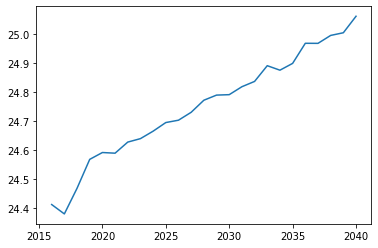

Temperature change in 50 years (1990 - 2040) : 1.601851589290117 °C


In [ ]:
# Last year we want to predict
year=2040

# Creation of a list where each new value is the previous one increased by the percentage given in dict_increase
lista=[]
for i in range (year-2019):
  row=[]
  for j in range (len(X_test.columns)):
    if i==0:
      row.append(X_test.iloc[-1,j]*(1+dict_aumento[X_test.columns[j]]/100))
    else:
      row.append(lista[i-1][j]*(1+dict_aumento[X_test.columns[j]]/100))
  lista.append(row)


# The list is converted into a dataframe and added to the test dataframe X_test in a new variable called X_future
X_futuro = X_test.append(pd.DataFrame(lista, columns=X_test.columns))
X_futuro.index = np.arange(2016,2041,1)

# Gaussian noise is added to the data equivalent to 10% of the standard deviation of each column.
for i in X_futuro.columns:
  X_futuro[i]=X_futuro[i]+np.random.normal(0,0.1*X_futuro[i].std(),X_futuro[i].shape)

# Preditiction
pred = pipeline_BR.predict(X_futuro)

# Function to denormalize data
def rev_min_max_func(scaled_val):
    max_val = max(df_final["Temperature"])
    min_val = min(df_final["Temperature"])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

# Copy of the used dataframe
new_df=pred.copy()

# Data denormalization
for i in range(len(new_df)):
  new_df[i] = rev_min_max_func(new_df[i])

# Graph
new_x=[x for x in range (2016,2016+len(new_df))]
plt.plot(new_x,new_df)
plt.show()

#Final result for temperature
print(f"Temperature change in {new_x[-1]-1990} years (1990 - {new_x[-1]}) : {new_df[-1]-df_final['Temperature'].iloc[0]} °C")

#### Three main scenarios

Temperature change in the Worst scenario : 4.077437966327196 °C
Temperature change in the Expected scenario : 1.6041850389810968 °C
Temperature change in the Best scenario : 1.1241075210678524 °C


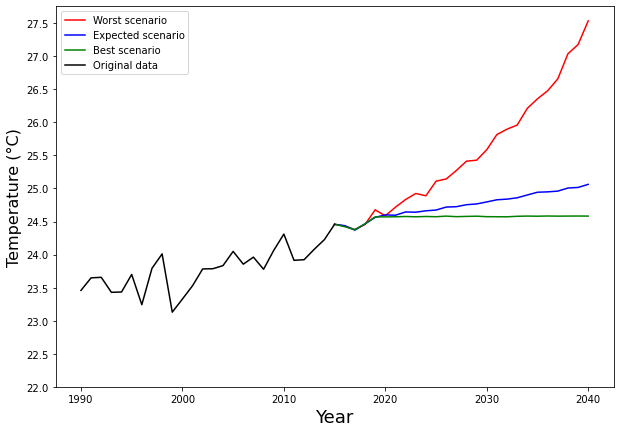

In [ ]:
# Three main scenarios
year_plot=2019
x_plots=np.arange(2015,2041,1)

import math

year_plot=year_plot-1990
y=new_df
fig=plt.figure(figsize=(10,7))
axs = fig.add_subplot(1,1,1)
titles=["Worst scenario", "Expected scenario", "Best scenario"]
colors=["r","b","g"]
for ax in range(3):
  if ax==0:
    dict_aumento={key:7 for key in dict_aumento.keys()}
  elif ax==1:
    dict_aumento={key:2 for key in dict_aumento.keys()}
  else:
    dict_aumento={key:0.05 for key in dict_aumento.keys()}
  lista=[]
  for i in range (year-2019):
    row=[]
    for j in range (len(X_test.columns)):
      if i==0:
        row.append(X_test.iloc[-1,j]*(1+dict_aumento[X_test.columns[j]]/100))
      else:
        row.append(lista[i-1][j]*(1+dict_aumento[X_test.columns[j]]/100))
    lista.append(row)
  X_futuro = X_test.append(pd.DataFrame(lista, columns=X_test.columns))
  X_futuro.index = np.arange(2016,2041,1)
  for i in X_futuro.columns:
    X_futuro[i]=X_futuro[i]+np.random.normal(0,0.1*X_futuro[i].std(),X_futuro[i].shape)

  # Preditiction
  pred = pipeline_BR.predict(X_futuro)

  # Copy of the used dataframe
  new_df=pred.copy()

  # Data denormalization
  for i in range(len(new_df)):
    new_df[i] = rev_min_max_func(new_df[i])
  
  new_df=np.insert(new_df,0,df_final["Temperature"].iloc[25])
  #new_df.insert(0,df_final["Temperature"].iloc[25])

  plt.plot(x_plots,new_df,label=titles[ax],color=colors[ax])
  

  print(f"Temperature change in the {titles[ax]} : {new_df[-1]-((df_final['Temperature'].iloc[0]))} °C")

x_original=np.arange(1990,2016,1)
original_y=df_final["Temperature"].iloc[:26]
plt.plot(x_original,original_y,label="Original data",color="k")
start, end = axs.get_ylim()
axs.yaxis.set_ticks(np.arange(math.floor(start), math.ceil(end), 0.5))
axs.set_xlabel('Year', fontsize=18)
axs.set_ylabel('Temperature (°C)', fontsize=16)
axs.legend()
fig.show()